<a href="https://colab.research.google.com/github/slavcho-k/vnp_labs/blob/master/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [1]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....

In [51]:
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
import warnings
import pandas as pd

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [25]:
#add your code
url = 'https://mobelix.com.mk/mk/mobilni-telefoni?page=' + '1'
snapshot = requests.get(url)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [4]:
#add your code
snapshot

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [5]:
#add your code
raw_html = snapshot.text
html = BeautifulSoup(raw_html, 'html.parser')

**Print the HTML code that you get**

In [6]:
#add your code
html

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [49]:
#add your code
#Phone brand: html tag (<h5 class="mb-0">)
#Phone type: html tag (<h3 class="h5 font-weight-normal">)
#Phone price: html tag (<p class="h5 price">)

#get number of pages
ul_pagination = html.find('ul', {'class' : 'pagination'})
li_elems = ul_pagination.find_all('li')
last_li = li_elems[-2]
last_value = int(last_li.find('a').text)

items = []

for num in range(1, last_value + 1):
    new_url = 'https://mobelix.com.mk/mk/mobilni-telefoni?page=' + str(num)
    snapshot = requests.get(new_url)
    raw = snapshot.text
    soup = BeautifulSoup(raw, 'html.parser')

    phones_list = soup.find_all('h3', class_='h5 font-weight-normal')
    brands_list = soup.find_all('h5', class_='mb-0')
    prices_list = soup.find_all('p', class_='h5 price')

    for i in range(len(phones_list)):
        brand = brands_list[i].text
        phone = phones_list[i].text

        price = prices_list[i]
        del_elem = price.find('del')
        if del_elem:
            price_text = price.get_text().replace(del_elem.get_text(), '')
        else:
            price_text = price.text

        item = {
            'brand': brand,
            'phone': phone,
            'price': price_text
        }
        items.append(item)


[{'brand': 'Blackberry', 'phone': 'Porsche Design P9981', 'price': '19,000.00 ден'}, {'brand': 'Samsung', 'phone': 'Galaxy A03s 4/64GB', 'price': '8,300.00 ден'}, {'brand': 'Samsung', 'phone': 'Galaxy A04s 3/32GB', 'price': '8,300.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 13 Pro 512GB', 'price': '67,600.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Plus 256GB', 'price': '56,600.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Pro 512GB', 'price': '89,200.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Pro Max 1TB', 'price': '98,400.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 13 Mini 256GB', 'price': '46,800.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Pro Max 128GB E-SIM', 'price': '61,500.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Plus 128GB', 'price': '49,200.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Pro Max 256GB E-SIM', 'price': '67,600.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Plus 256GB', 'price': '56,600.00 ден'}, {'brand': 'Apple', 'phone': 'iP

**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
#add your code

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
#add your code

**Print all lists that are containing the elements**

In [50]:
#add your code
print(items)

[{'brand': 'Blackberry', 'phone': 'Porsche Design P9981', 'price': '19,000.00 ден'}, {'brand': 'Samsung', 'phone': 'Galaxy A03s 4/64GB', 'price': '8,300.00 ден'}, {'brand': 'Samsung', 'phone': 'Galaxy A04s 3/32GB', 'price': '8,300.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 13 Pro 512GB', 'price': '67,600.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Plus 256GB', 'price': '56,600.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Pro 512GB', 'price': '89,200.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Pro Max 1TB', 'price': '98,400.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 13 Mini 256GB', 'price': '46,800.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Pro Max 128GB E-SIM', 'price': '61,500.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Plus 128GB', 'price': '49,200.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Pro Max 256GB E-SIM', 'price': '67,600.00 ден'}, {'brand': 'Apple', 'phone': 'iPhone 14 Plus 256GB', 'price': '56,600.00 ден'}, {'brand': 'Apple', 'phone': 'iP

**Check if all lists are the same size**

In [ ]:
#add your code

# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***




In [54]:
#add your code
df = pd.DataFrame(items)

**Print the dataset you obtain**

In [55]:
#add your code
print(df)

          brand                                           phone  \
0    Blackberry                            Porsche Design P9981   
1       Samsung                              Galaxy A03s 4/64GB   
2       Samsung                              Galaxy A04s 3/32GB   
3         Apple                             iPhone 13 Pro 512GB   
4         Apple                            iPhone 14 Plus 256GB   
..          ...                                             ...   
184     Samsung                         Galaxy F22 4GB RAM/64GB   
185      Xiaomi              Xiaomi 12s Ultra 5G 12GB RAM/512GB   
186        ASUS                Asus ROG Phone 6D 16GB RAM/256GB   
187        ASUS  Asus ROG Phone 6 Batman Edition 12GB RAM/256GB   
188        ASUS       Asus ROG Phone 6D Ultimate 16GB RAM/512GB   

              price  
0     19,000.00 ден  
1      8,300.00 ден  
2      8,300.00 ден  
3     67,600.00 ден  
4     56,600.00 ден  
..              ...  
184    9,200.00 ден  
185   61,500.00 ден

#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [58]:
#add your code
# df['price'] = df['price'].str.replace(' ден', '').str.replace(',', '').astype(float)

mean_price = df['price'].mean()
median_price = df['price'].median()
std_deviation = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation: {std_deviation}")
print(f"Minimum Price: {min_price}")
print(f"Maximum Price: {max_price}")

Mean Price: 41060.10582010582
Median Price: 36900.0
Standard Deviation: 27067.813735399362
Minimum Price: 4300.0
Maximum Price: 159900.0


# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

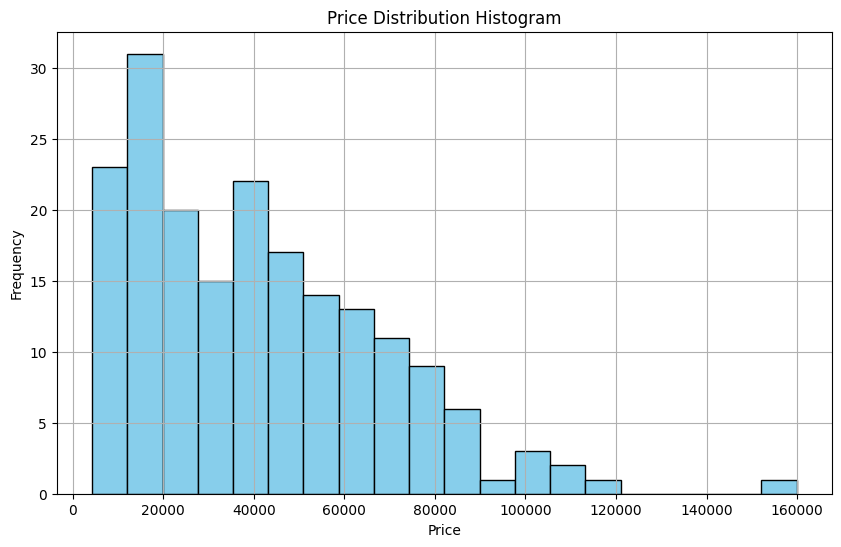

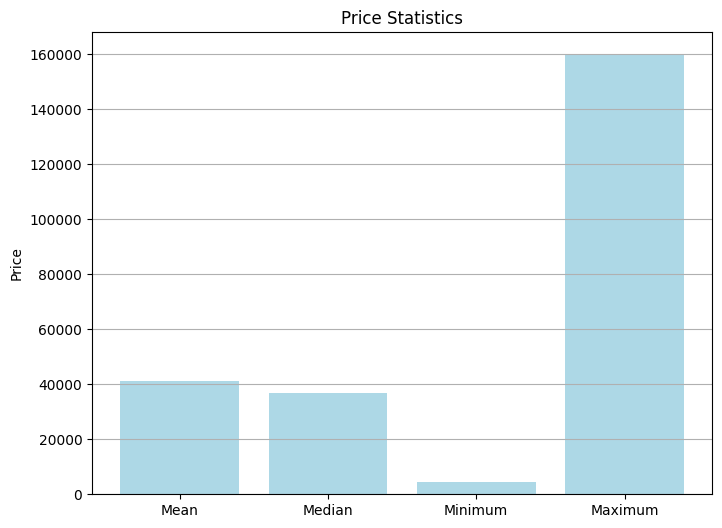

In [60]:
#add your code
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

summary_data = {
    'Statistics': ['Mean', 'Median', 'Minimum', 'Maximum'],
    'Price': [mean_price, median_price, min_price, max_price]
}

summary_df = pd.DataFrame(summary_data)

plt.figure(figsize=(8, 6))
plt.bar(summary_df['Statistics'], summary_df['Price'], color='lightblue')
plt.title('Price Statistics')
plt.ylabel('Price')
plt.grid(axis='y')

plt.show()
